**LOAD PACKAGES FOR SENTIMENT ANALYSIS**

In [ ]:
!pip install transformers
!pip install datasets
!pip install sentencepiece
!pip install rouge_score
!pip install nltk
!pip install torch
!pip install flashtext
!pip install textblob
!pip install vaderSentiment
!pip install chardet

**IMPORT LIBRARIES FOR ANALYSIS**

In [ ]:
# prompt: IMPORT LIBRARIES FOR ANALYSIS

import transformers
import datasets
import sentencepiece
import rouge_score
import nltk
import nltk
nltk.download('vader_lexicon')
import torch
import flashtext
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import chardet
import matplotlib.pyplot as plt


In [3]:
# Import libraries
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

**LOADING AND READING DATA**

In [ ]:
file_name = 'Reviews.csv'

with open(file_name, 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

df = pd.read_csv(file_name, encoding=encoding)

df.head()

**PREPARING DATA FOR ANALYSIS**

In [ ]:
# prompt: Using dataframe df: data cleaning code

# Drop duplicate rows
df = df.drop_duplicates()

# Remove rows with missing values
df = df.dropna()

# Convert data types to appropriate formats
df['PHONE'] = df['PHONE'].astype('string')
df['POSTALCODE'] = df['POSTALCODE'].astype('string')

# Handle outliers
df = df[(df['DEALSIZE'] != 'large')]

# Standardize data
df['CUSTOMERNAME'] = df['CUSTOMERNAME'].str.lower()
df['CITY'] = df['CITY'].str.title()


In [13]:
df.head()


,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,REVIEWS,PRODUCTLINE
0,handji gifts& co,+65 224 1555,village close - 106 linden road sandown,singapore,69045,singapore,victorino,wendy,small,i will recommend you to everyone,vintage cars
1,salzburg collectables,6562-9555,geislweg 14,salzburg,5020,austria,pipps,georg,small,one of the best car buying experiences autopr...,classic cars
2,euro shopping channel,(91) 555 94 44,"c/ moralzarzal, 86",madrid,28034,spain,freyre,diego,small,we bought a truck from autopro sales without ...,trucks and buses
3,la rochelle gifts,40.67.8555,"67, rue des cinquante otages",nantes,44000,france,labrune,janine,small,arrived safe and sound in nantes in just a few...,motorcycles
4,mini gifts distributors ltd.,4155551450,5677 strong st.,san rafael,97562,usa,nelson,valarie,small,they willingly helped arrange a professional s...,trucks and buses


In [15]:
# Lowercase all text columns
df['CUSTOMERNAME'] = df['CUSTOMERNAME'].str.lower()
df['PHONE'] = df['PHONE'].str.lower()
df['ADDRESSLINE1'] = df['ADDRESSLINE1'].str.lower()
df['CITY'] = df['CITY'].str.lower()
df['POSTALCODE'] = df['POSTALCODE'].str.lower()
df['COUNTRY'] = df['COUNTRY'].str.lower()
df['CONTACTLASTNAME'] = df['CONTACTLASTNAME'].str.lower()
df['CONTACTFIRSTNAME'] = df['CONTACTFIRSTNAME'].str.lower()

In [ ]:
df.head()

**TRAINING MODEL FOR ANALYSIS**

In [20]:
# Create a new column for sentiment score
df['SENTIMENT_SCORE'] = 0

# Initialize sentiment analysis
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each row
for index, row in df.iterrows():
  sentiment = analyzer.polarity_scores(row['REVIEWS'])
  df.at[index, 'SENTIMENT_SCORE'] = sentiment['compound']



In [24]:
# Print the updated DataFrame
df.head()
#print(df)

,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,REVIEWS,PRODUCTLINE,SENTIMENT_SCORE
0,handji gifts& co,+65 224 1555,village close - 106 linden road sandown,singapore,69045,singapore,victorino,wendy,small,i will recommend you to everyone,vintage cars,0.3612
1,salzburg collectables,6562-9555,geislweg 14,salzburg,5020,austria,pipps,georg,small,one of the best car buying experiences autopr...,classic cars,0.4749
2,euro shopping channel,(91) 555 94 44,"c/ moralzarzal, 86",madrid,28034,spain,freyre,diego,small,we bought a truck from autopro sales without ...,trucks and buses,0.5520
3,la rochelle gifts,40.67.8555,"67, rue des cinquante otages",nantes,44000,france,labrune,janine,small,arrived safe and sound in nantes in just a few...,motorcycles,0.4404
4,mini gifts distributors ltd.,4155551450,5677 strong st.,san rafael,97562,usa,nelson,valarie,small,they willingly helped arrange a professional s...,trucks and buses,0.0000


**ANALYSIS OF SENTIMENT SCORE**

In [25]:
# Calculate the mean sentiment score
mean_sentiment = df['SENTIMENT_SCORE'].mean()

# Calculate the median sentiment score
median_sentiment = df['SENTIMENT_SCORE'].median()

# Calculate the standard deviation of the sentiment scores
std_sentiment = df['SENTIMENT_SCORE'].std()

# Print the results
print("Mean sentiment score:", mean_sentiment)
print("Median sentiment score:", median_sentiment)
print("Standard deviation of sentiment scores:", std_sentiment)


Mean sentiment score: 0.43382975206611574
Median sentiment score: 0.5106
Standard deviation of sentiment scores: 0.3168230875016918


**Filtering reviews by sentiment category into Positive, Negative or Neutral**

In [26]:
# Create a new column for sentiment category
df['SENTIMENT_CATEGORY'] = ''

# Define the sentiment categories
sentiment_categories = {
    'positive': 0.05,
    'neutral': -0.05,
    'negative': -0.7
}

# Apply the sentiment categories to the DataFrame
for index, row in df.iterrows():
    if row['SENTIMENT_SCORE'] >= sentiment_categories['positive']:
        df.at[index, 'SENTIMENT_CATEGORY'] = 'positive'
    elif row['SENTIMENT_SCORE'] >= sentiment_categories['neutral']:
        df.at[index, 'SENTIMENT_CATEGORY'] = 'neutral'
    else:
        df.at[index, 'SENTIMENT_CATEGORY'] = 'negative'

In [27]:
# Print the updated DataFrame
df.head()

,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,REVIEWS,PRODUCTLINE,SENTIMENT_SCORE,SENTIMENT_CATEGORY
0,handji gifts& co,+65 224 1555,village close - 106 linden road sandown,singapore,69045,singapore,victorino,wendy,small,i will recommend you to everyone,vintage cars,0.3612,positive
1,salzburg collectables,6562-9555,geislweg 14,salzburg,5020,austria,pipps,georg,small,one of the best car buying experiences autopr...,classic cars,0.4749,positive
2,euro shopping channel,(91) 555 94 44,"c/ moralzarzal, 86",madrid,28034,spain,freyre,diego,small,we bought a truck from autopro sales without ...,trucks and buses,0.5520,positive
3,la rochelle gifts,40.67.8555,"67, rue des cinquante otages",nantes,44000,france,labrune,janine,small,arrived safe and sound in nantes in just a few...,motorcycles,0.4404,positive
4,mini gifts distributors ltd.,4155551450,5677 strong st.,san rafael,97562,usa,nelson,valarie,small,they willingly helped arrange a professional s...,trucks and buses,0.0000,neutral


In [28]:
# Filter reviews by sentiment category
positive_reviews = df[df['SENTIMENT_CATEGORY'] == 'positive']
neutral_reviews = df[df['SENTIMENT_CATEGORY'] == 'neutral']
negative_reviews = df[df['SENTIMENT_CATEGORY'] == 'negative']

# Print the number of reviews in each category
print("Number of positive reviews:", len(positive_reviews))
print("Number of neutral reviews:", len(neutral_reviews))
print("Number of negative reviews:", len(negative_reviews))

Number of positive reviews: 94
Number of neutral reviews: 22
Number of negative reviews: 5


In [29]:
# Print sample positive and negative reviews
print("Sample positive reviews:")
print(positive_reviews['REVIEWS'].sample(5).to_string(index=False))

print("\nSample negative reviews:")
print(negative_reviews['REVIEWS'].sample(5).to_string(index=False))

print("\nSample neutral reviews:")
print(neutral_reviews['REVIEWS'].sample(5).to_string(index=False))


Sample positive reviews:
                            looks and sounds great
                                   excellent value
we are pleased with the price we received for t...
top notch service all the way they shipped my c...
my phone conversation with you was fantastic yo...

Sample negative reviews:
if you are in the market to buy or sell a class...
20 plus years in the car trade myself and can’t...
i have had other classic cars but none this nic...
 some problems started early on and some contin...
i wouldn’t hesitate when i buy my next classic ...

Sample neutral reviews:
                                more than expected
they willingly helped arrange a professional sh...
autopro sales has been our go to place for buyi...
paul was very patient and understanding of wher...
 my 1995 mazda rx7 arrived two days after purchase


**Other relevant  evaluation of sentiments**

**WORDCLOUD ANALYSIS**

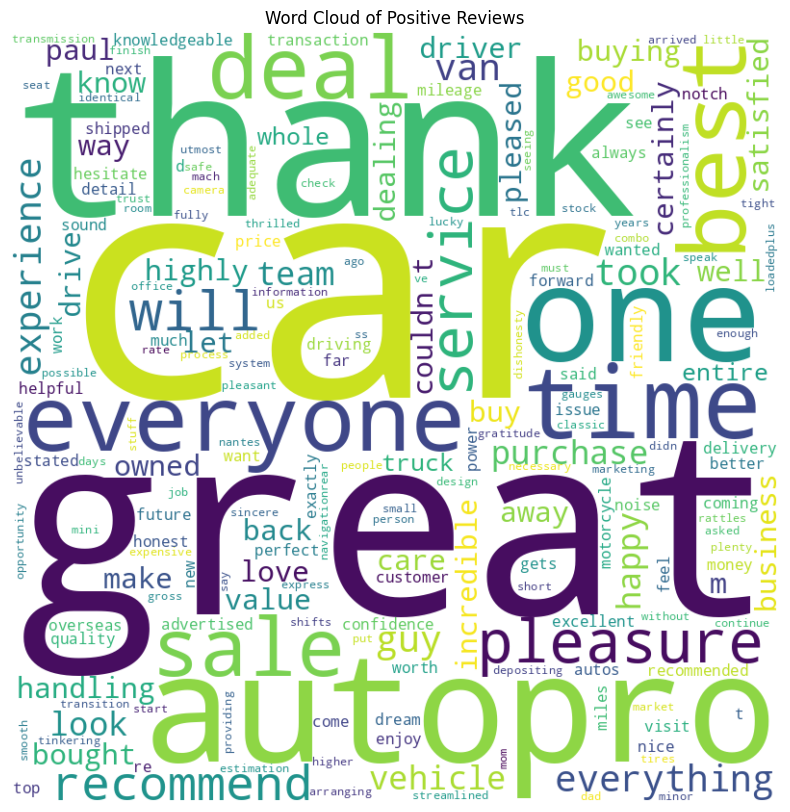

In [32]:


# Create a word cloud of the positive reviews
from wordcloud import WordCloud

positive_text = ' '.join(positive_reviews['REVIEWS'])
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()



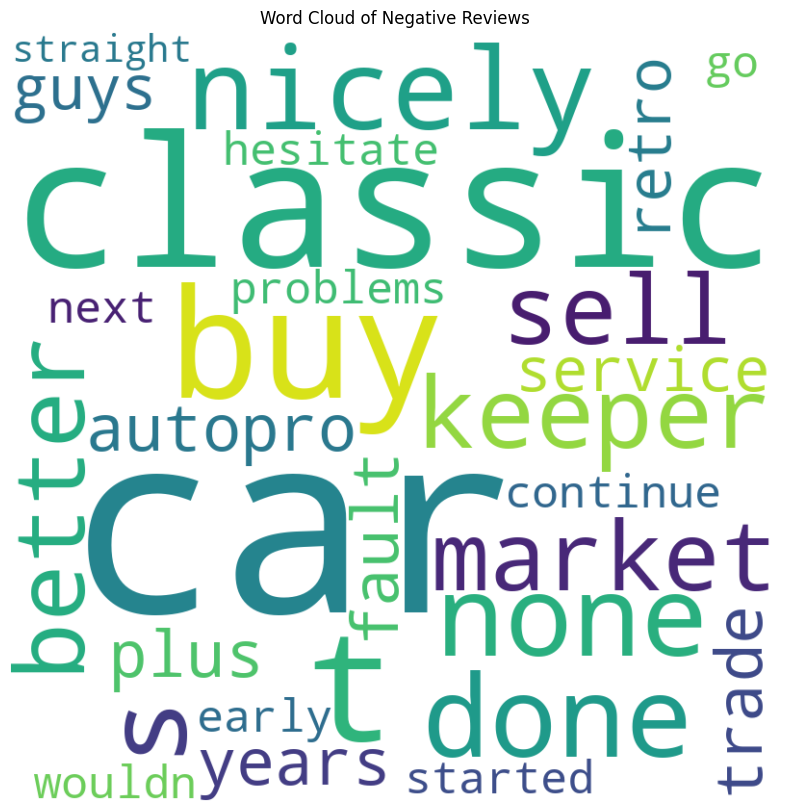

In [33]:
# Create a word cloud of the negative reviews
negative_text = ' '.join(negative_reviews['REVIEWS'])
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(negative_text)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews')
plt.show()

